In [1]:
import numpy as np

In [2]:

def get_bandit_function(bandits_means, bandits_sigma=1):

    def checkValue(action):
        try: return np.random.normal(bandits_means[action],1) 
        except: print("Bandit doesn't exist . Follow Instruction please")
            
    return lambda action : checkValue(action) 

In [32]:
bandits_means = np.random.normal(0,1,10)
bandit_fct = get_bandit_function(bandits_means, bandits_sigma=1)
print bandit_fct(4)
#bandits_means

1.87106300486


In [83]:
def epsGreedy(epsilon,armValues):
    rand_num = np.random.rand() 
    if epsilon>rand_num: 
        return np.random.randint(10),False
    else: 
        return np.argmax(armValues),True

def updateArm(action,reward,k,armValues): 
        k[action] += 1 
        armValues[action] += (reward - armValues[action])/k[action]


def get_average_rewards(epsilon=0.1, optimistic=0, nb_runs=2000, nb_steps=1000):
    
    
    
    rewards = np.zeros(nb_steps)
    optimalAction = np.zeros(nb_steps)
    

    
    for i in range(nb_runs):
        
        armValues = np.full(10, optimistic)
        k = np.zeros(10)
        bandit_means = np.random.normal(0,1,10)
        
        bandit_fct = get_bandit_function(bandit_means, bandits_sigma=1)
        optimal_action = np.argmax(bandits_means)
        
        temp = np.zeros(nb_steps)
        actions = np.zeros(nb_steps,dtype= 'int')
        for j in range(nb_steps):
            action,check = epsGreedy(epsilon,armValues)
            r = bandit_fct(action)
            updateArm(action,r,k,armValues)
            temp[j] = r
            actions[j] = action
                

        rewards += temp
        optimalAction[actions == optimal_action] += 1
        
    avgRewards = rewards/nb_runs
    avgOptimalAction = optimalAction/nb_runs
    
    return avgRewards,avgOptimalAction
    

In [84]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0, optimistic=0.)

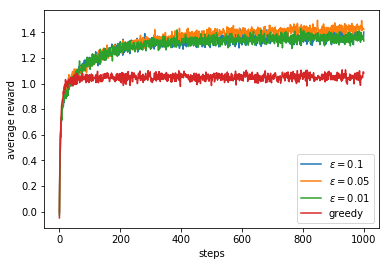

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
nb_steps = 1000
plt.plot(np.arange(nb_steps),avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps),avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps),avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps),avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()

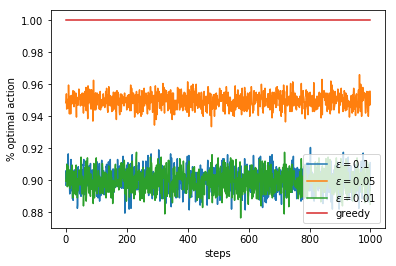

In [86]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
#plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.show()

In [75]:
optimal_actions_e005

array([ 0.003 ,  0.0025,  0.0025,  0.003 ,  0.0025,  0.0025,  0.0025,
        0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.0025,  0.003 ,  0.003 ,
        0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.003 ,
        0.002 ,  0.0025,  0.0025,  0.003 ,  0.003 ,  0.003 ,  0.003 ,
        0.003 ,  0.003 ,  0.003 ,  0.0025,  0.0025,  0.003 ,  0.003 ,
        0.003 ,  0.0015,  0.003 ,  0.003 ,  0.003 ,  0.0025,  0.003 ,
        0.003 ,  0.003 ,  0.0025,  0.0025,  0.003 ,  0.003 ,  0.0025,
        0.0025,  0.0025,  0.003 ,  0.0025,  0.0025,  0.003 ,  0.003 ,
        0.0025,  0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.002 ,  0.003 ,
        0.003 ,  0.003 ,  0.002 ,  0.003 ,  0.003 ,  0.003 ,  0.003 ,
        0.0025,  0.003 ,  0.0025,  0.003 ,  0.003 ,  0.003 ,  0.003 ,
        0.003 ,  0.0025,  0.0025,  0.003 ,  0.003 ,  0.003 ,  0.0025,
        0.003 ,  0.003 ,  0.003 ,  0.0025,  0.003 ,  0.003 ,  0.003 ,
        0.003 ,  0.003 ,  0.003 ,  0.003 ,  0.0025,  0.0025,  0.0025,
        0.003 ,  0.0